In [1]:
library(bnlearn)

data(asia)
head(asia)

asia[asia$X == "yes", "D"] <- NA
head(asia)
sum(is.na(asia$D))

,A,S,T,L,B,E,X,D
1,no,yes,no,no,yes,no,no,yes
2,no,yes,no,no,no,no,no,no
3,no,no,yes,no,no,yes,yes,yes
4,no,no,no,no,yes,no,no,yes
5,no,no,no,no,no,no,no,yes
6,no,yes,no,no,no,no,no,yes


,A,S,T,L,B,E,X,D
1,no,yes,no,no,yes,no,no,yes
2,no,yes,no,no,no,no,no,no
3,no,no,yes,no,no,yes,yes,NA
4,no,no,no,no,yes,no,no,yes
5,no,no,no,no,no,no,no,yes
6,no,yes,no,no,no,no,no,yes


[1] 569

In [2]:
asia.net <- bn.fit(hc(asia, debug = F, 
                      whitelist = data.frame(from = c("A", "A", "B"), to = c("L", "T", "X"))), 
                   asia)

ERROR: Error in check.data(x): the data set contains NULL/NaN/NA values.


In [3]:
library(catnet)

cat.set <- cnSearchSA(asia, maxParentSet = 2, maxIter = 200, numThreads = 4)
cat.set

 Number of nodes    = 8, 
 Sample size        = 5000,
 Number of networks = 20
 Processing time    = 2.786
 

In [4]:
cat.best <- cnFindBIC(cat.set, nrow(asia))
cat.best

A catNetwork object with  8  nodes,  2  parents,  2  categories,
 Likelihood =  -2.199118 , Complexity =  16 .

Loading required package: graph

Attaching package: ‘graph’

The following objects are masked from ‘package:bnlearn’:

    degree, nodes, nodes<-

Loading required package: grid


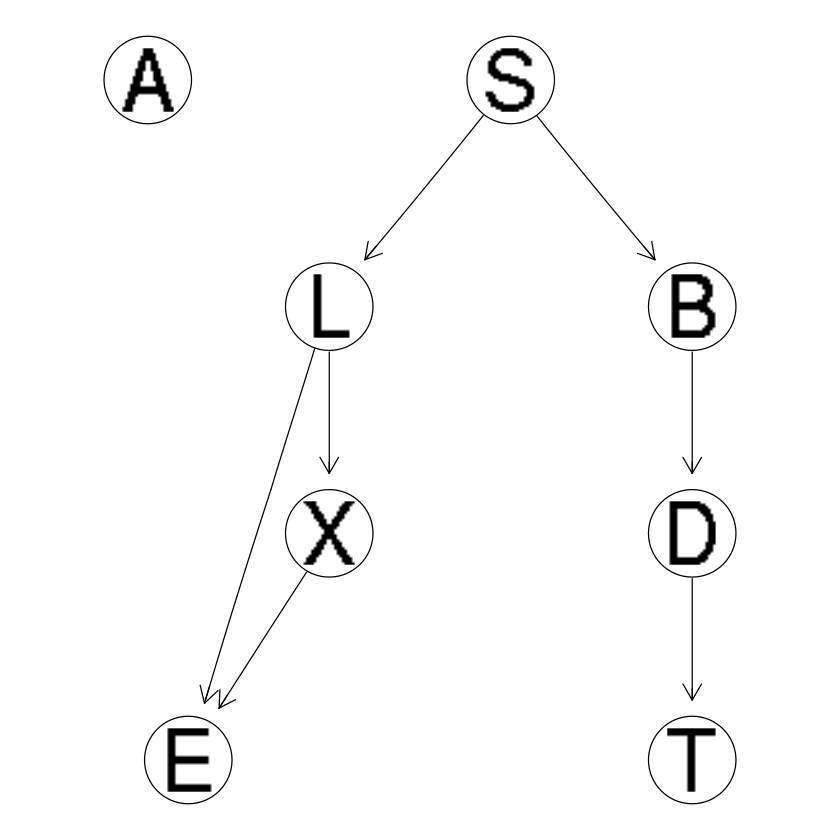

In [5]:
library(Rgraphviz)

em <- empty.graph(names(asia))
arcs(em) <- cnMatEdges(cat.best)

graphviz.plot(em)